In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data= pd.read_csv("C:/Users/Maaz/Downloads/CORONA.csv")
data.head()

,id,location,country,gender,age,symptom_onset,visiting Wuhan,from Wuhan,death,recovered,link
0,1,"Shenzhen, Guangdong",China,male,66.0,01-03-2020,1,0.0,0,0,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,Shanghai,China,female,56.0,1/15/2020,0,1.0,0,0,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,Zhejiang,China,male,46.0,01-04-2020,0,1.0,0,0,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,Tianjin,China,female,60.0,NaN,1,0.0,0,0,https://m.weibo.cn/status/4463235401268457?
4,5,Tianjin,China,male,58.0,NaN,0,0.0,0,0,https://m.weibo.cn/status/4463235401268457?


In [48]:
data = data.drop(['id','location','symptom_onset','link'],1)
data = data.dropna()
data.isna().sum()

country           0
gender            0
age               0
visiting Wuhan    0
from Wuhan        0
death             0
recovered         0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
data_cat = data.loc[:,('gender')]
data_one_hot = pd.get_dummies(data_cat)
data = pd.concat([data,data_one_hot],1)
data= data.drop(['gender'],1)
data.head()

,country,age,visiting Wuhan,from Wuhan,death,recovered,female,male
0,China,66.0,1,0.0,0,0,0,1
1,China,56.0,0,1.0,0,0,1,0
2,China,46.0,0,1.0,0,0,0,1
3,China,60.0,1,0.0,0,0,1,0
4,China,58.0,0,0.0,0,0,0,1


In [50]:
data.describe()

,age,visiting Wuhan,from Wuhan,death,recovered,female,male
count,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,49.820341,0.177832,0.182704,0.070646,0.174178,0.422655,0.577345
std,17.940000,0.382604,0.386659,0.256388,0.379494,0.494283,0.494283
min,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
print(data.death.value_counts())
print(data.country.value_counts())

0    763
1     58
Name: death, dtype: int64
China          186
Japan          185
Hong Kong       93
South Korea     92
Singapore       90
Taiwan          31
Malaysia        23
Thailand        16
France          16
Spain           15
Australia       15
Germany         14
Canada          12
Vietnam          8
UAE              7
USA              6
Phillipines      3
Italy            1
Finland          1
Lebanon          1
Switzerland      1
Nepal            1
UK               1
Cambodia         1
Sri Lanka        1
Sweden           1
Name: country, dtype: int64


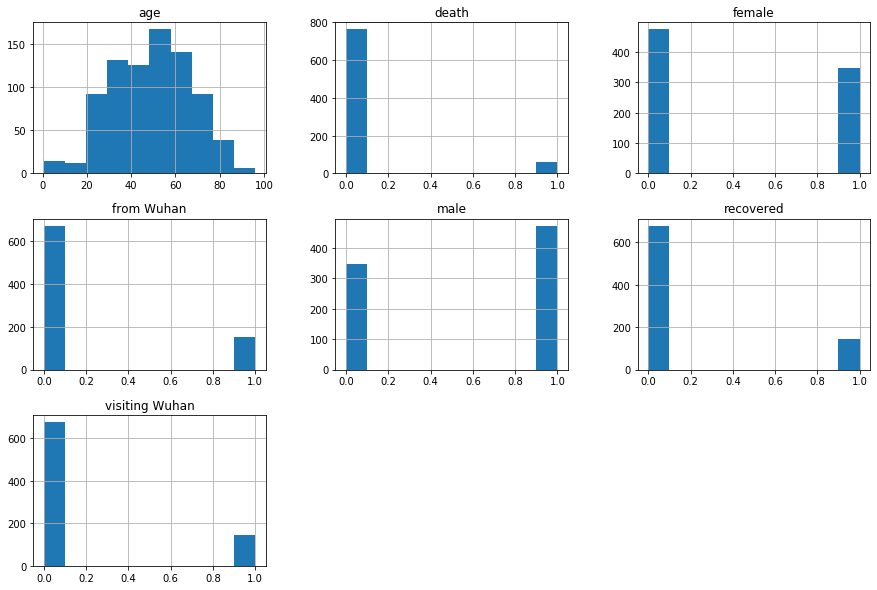

In [60]:
plt.rcParams['figure.figsize']=[15,10]
data.hist()
plt.show()

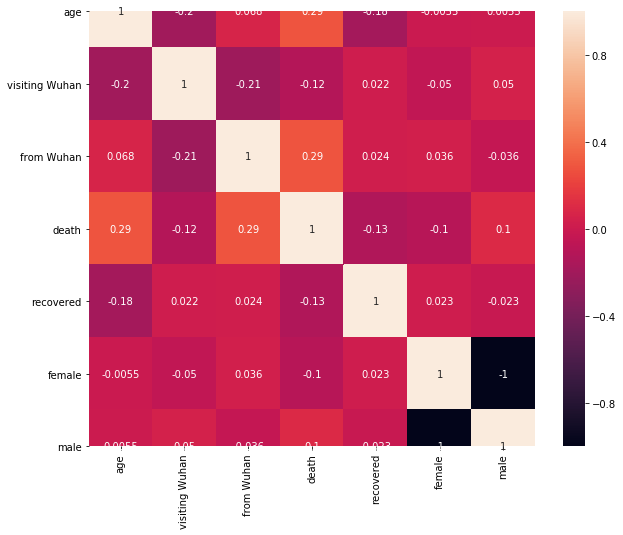

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

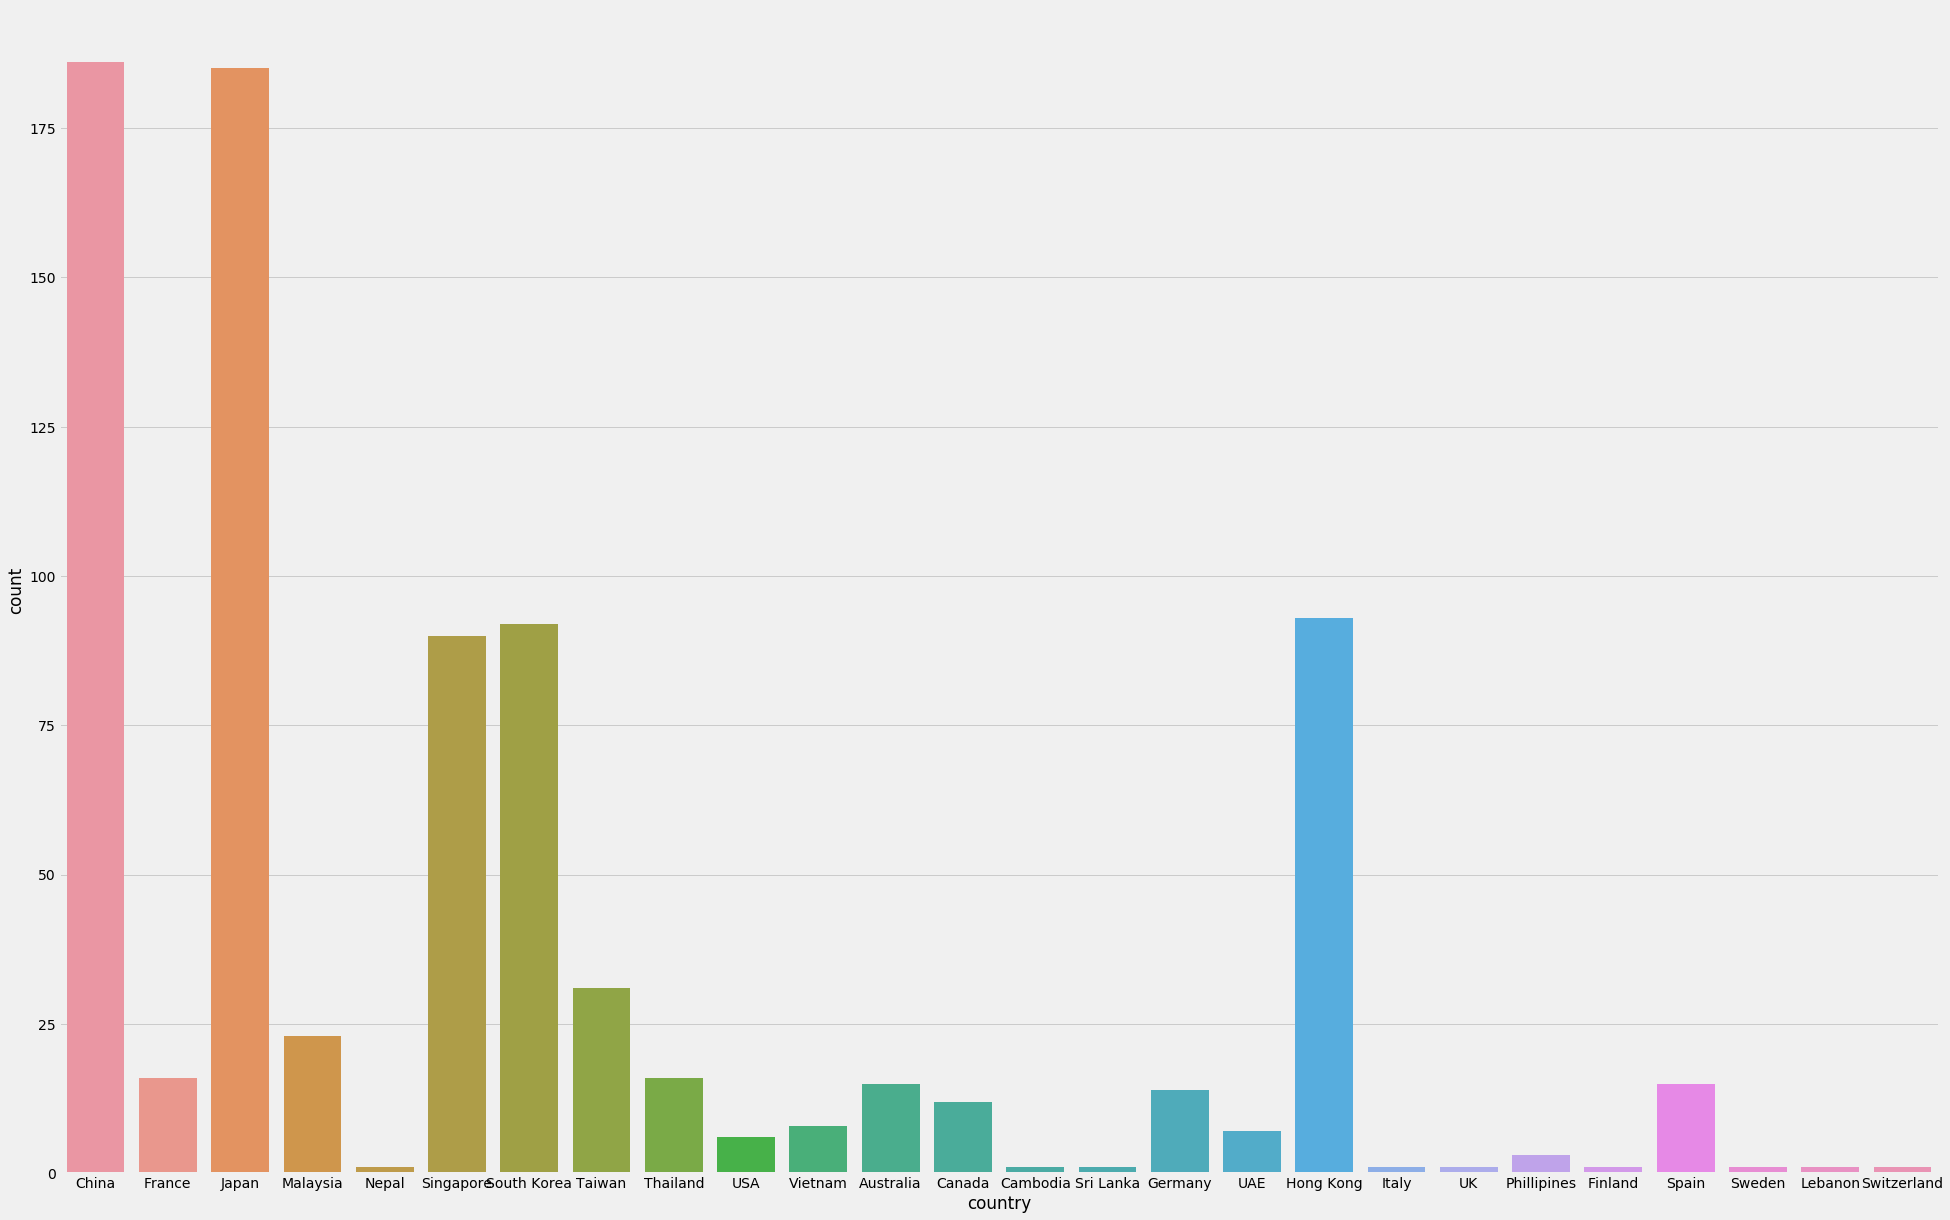

In [121]:
plt.figure(figsize=(30,20))
sns.countplot(x='country', data=data)
plt.show()

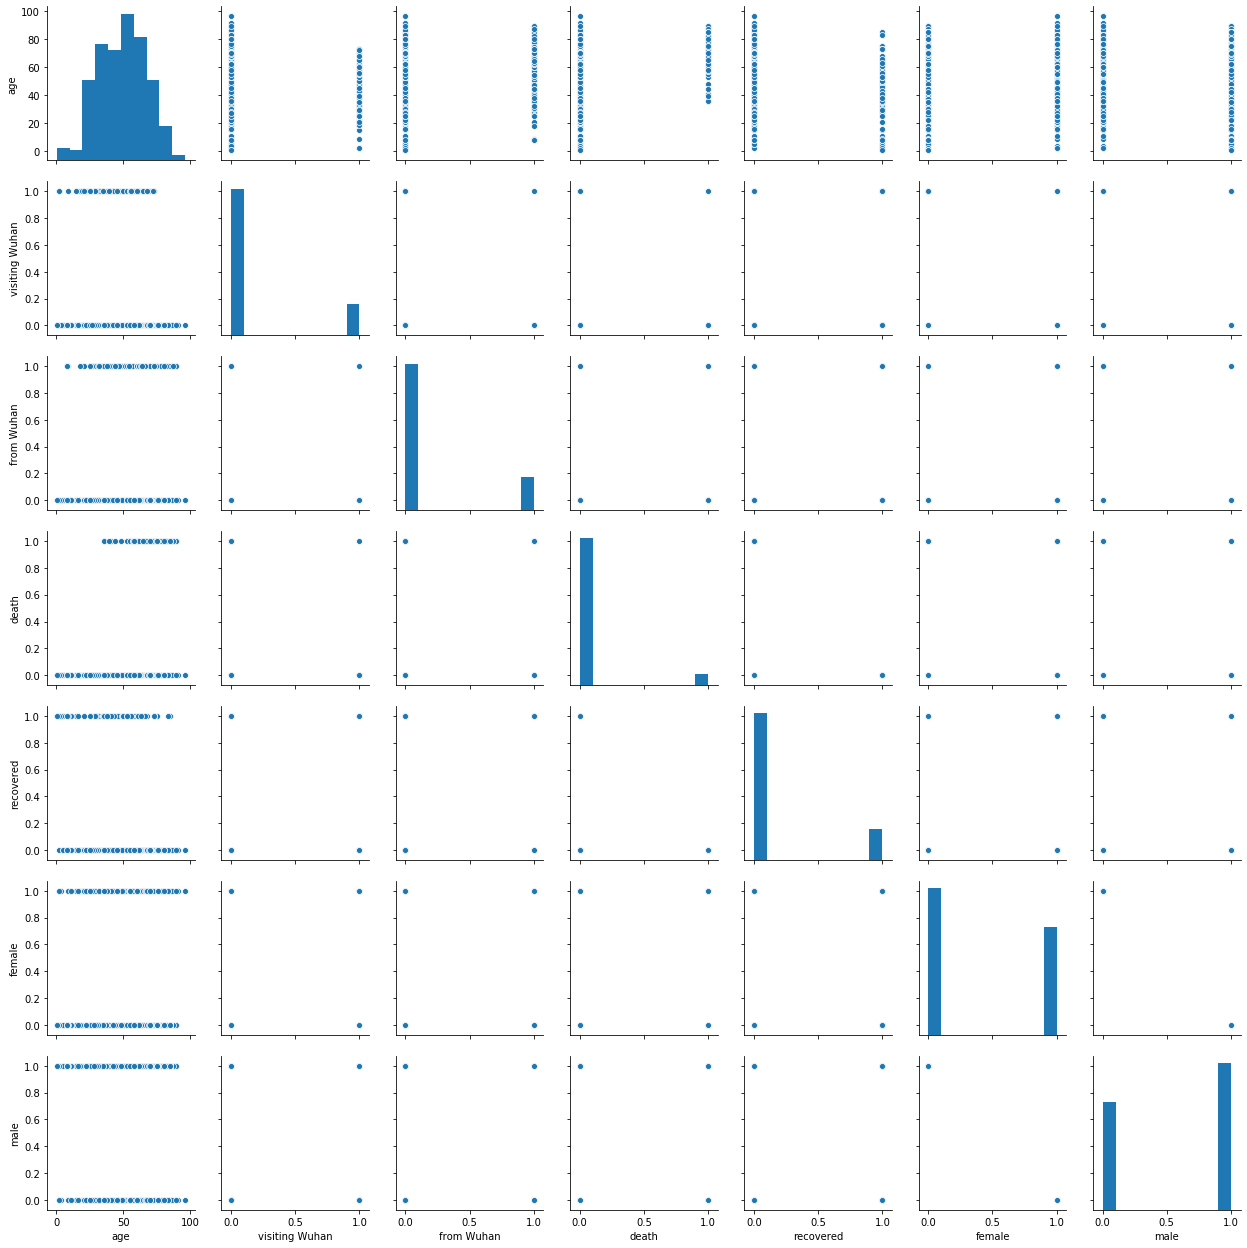

In [52]:
sns.pairplot(data)

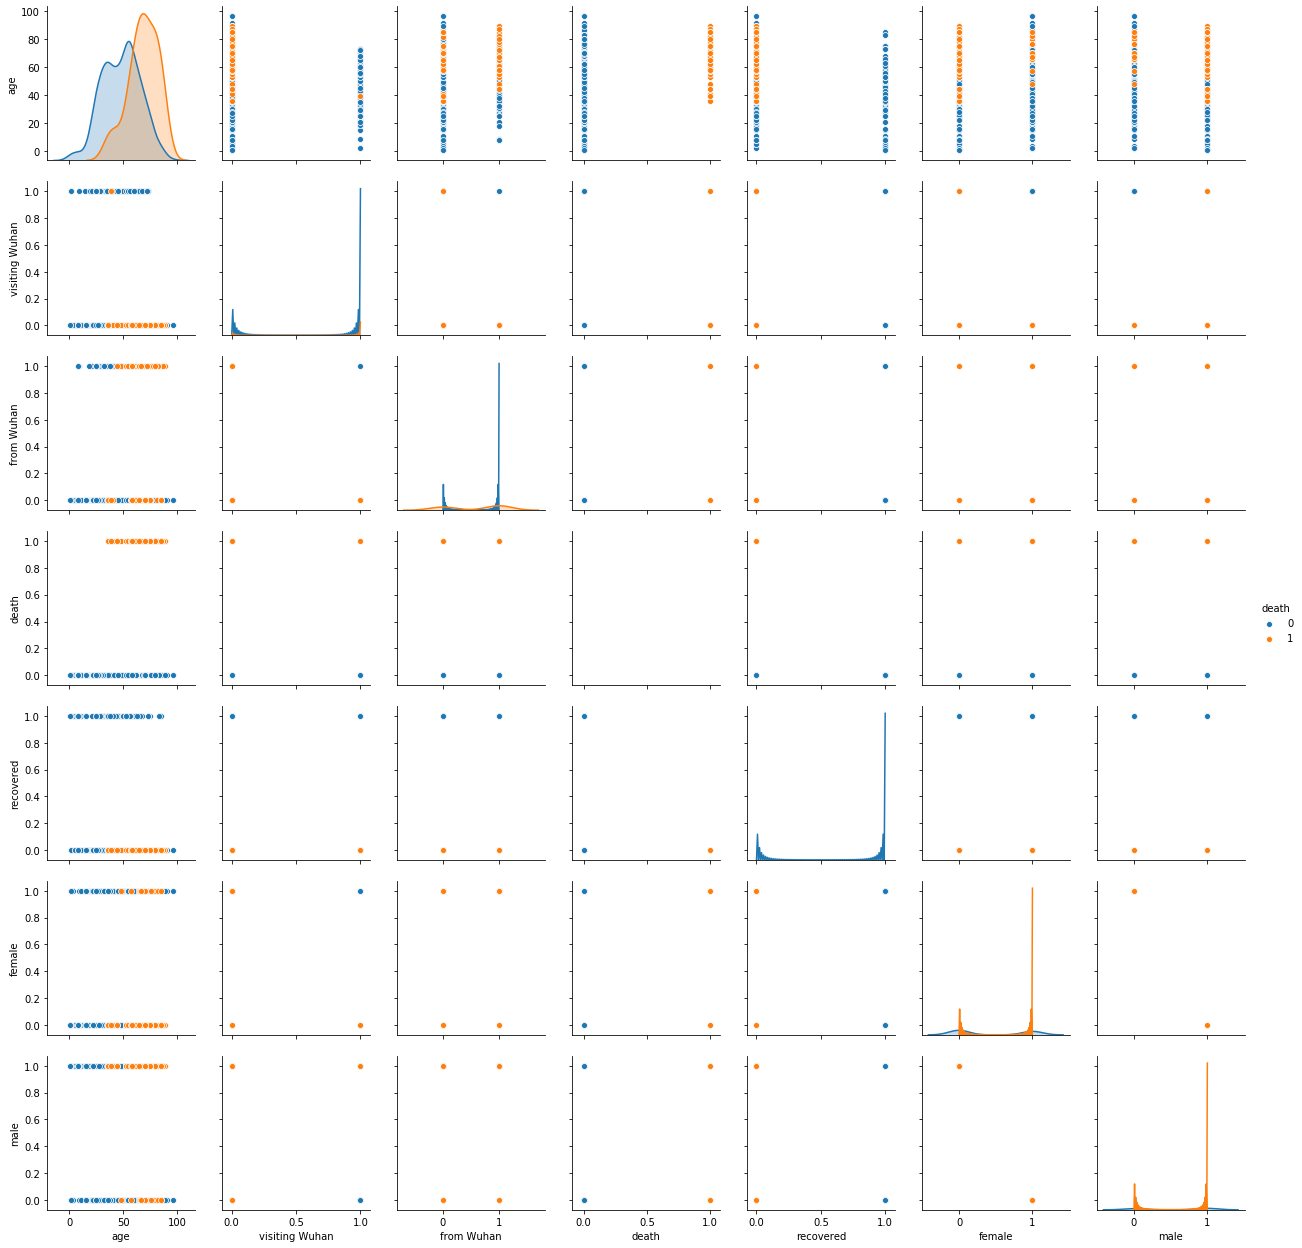

In [53]:
sns.pairplot(data, hue='death')

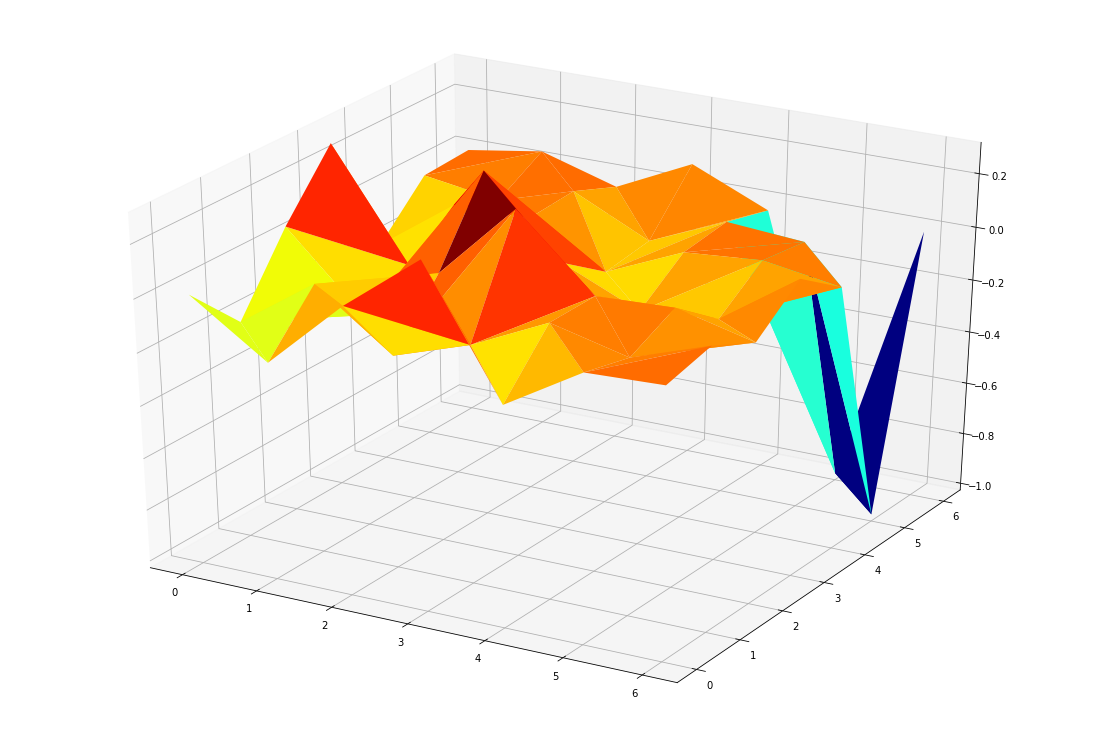

In [78]:
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D  
# generating correlation data 
df = data.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 
  
for i in range(0, len(df)): 
    for j in range(0, len(df)): 
        if i != j: 
            df.iloc[i, j] = (i, j, df.iloc[i, j]) 
        else : 
            df.iloc[i, j] = (i, j, 0) 
  
df_list = [] 

for sub_list in df.values: 
    df_list.extend(sub_list) 
  
# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 
  
fig = plt.figure() 
ax = Axes3D(fig) 
  
# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],  
                    cmap = cm.jet, linewidth = 0.2) 
  
plt.show() 

(array([0]), <a list of 1 Text xticklabel objects>)

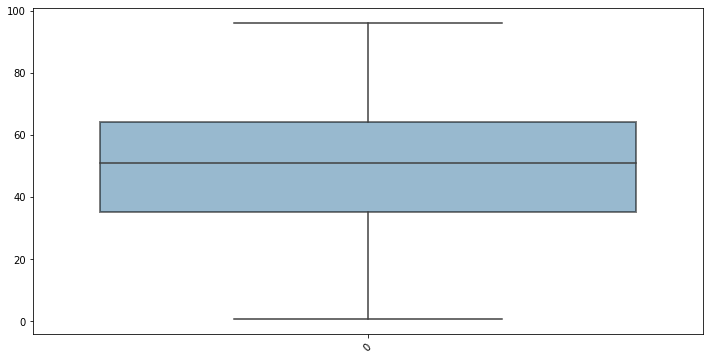

In [85]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(data=data['age'])
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)